# LFW

- create montages of images with more/less images

In [127]:
%reload_ext autoreload
%autoreload 2

import os
from os.path import join
import math
from glob import glob
from random import randint
from collections import Counter
from operator import itemgetter
import random

import cv2 as cv
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io
from pathlib import Path
from sklearn import preprocessing
from tqdm import tqdm_notebook as tqdm
import imutils

import sys
sys.path.append('/work/megapixels_dev/megapixels/')
from app.settings import app_cfg as cfg
from app.utils import file_utils
from app.models.bbox import BBox

In [25]:
DATA_STORE = '/data_store_hdd/'
dir_dataset = join(DATA_STORE, 'apps/megapixels/datasets/lfw')
dir_images = join(dir_dataset, 'images')

In [248]:
# get all image directories as names
dirs_im = glob(join(dir_images,'*'))
random.shuffle(dirs_im)
print('{} people'.format(len(dirs_im)))

5750 people


In [249]:
# load the first image for every person
people = []
for dir_im in tqdm(dirs_im):
  fp_ims = glob(join(dir_im, '*.jpg'))
  n_ims = len(fp_ims)
  if not n_ims > 0:
    continue
  fp_im = fp_ims[0]
  fpp_im = Path(fp_im)
  name = ' '.join(fpp_im.stem.split('_')[:-1])
  people.append({'name': name, 'fp':fp_im, 'count': n_ims})

In [250]:
# sort, in reverse to get the most frequent first
people_sorted = sorted(people, key=itemgetter('count'), reverse=True)
# count frequency
counts = [x['count'] for x in people_sorted]
counts = Counter(counts)
print('Most: {} ({}), least: {} ({})'.format(people_sorted[0]['name'], people_sorted[0]['count'], 
                                             people_sorted[-1]['name'], people_sorted[-1]['count']))
print(counts)

Most: George W Bush (530), least: Jamie Lee Curtis (1)
Counter({1: 4069, 2: 779, 3: 291, 4: 187, 5: 112, 6: 55, 7: 39, 8: 33, 9: 26, 11: 16, 10: 15, 15: 11, 13: 11, 14: 10, 12: 10, 17: 8, 19: 7, 22: 5, 20: 5, 18: 5, 21: 4, 33: 3, 32: 3, 24: 3, 23: 3, 16: 3, 52: 2, 42: 2, 41: 2, 39: 2, 31: 2, 30: 2, 29: 2, 28: 2, 26: 2, 530: 1, 236: 1, 144: 1, 121: 1, 109: 1, 77: 1, 71: 1, 60: 1, 55: 1, 53: 1, 49: 1, 48: 1, 44: 1, 37: 1, 36: 1, 35: 1, 27: 1, 25: 1})


In [259]:
for p in people_sorted[:5]:
  print(p['name'], p['count'])

George W Bush 530
Colin Powell 236
Tony Blair 144
Donald Rumsfeld 121
Gerhard Schroeder 109


In [251]:
# load images
for person in tqdm(people):
  person['im'] = cv.imread(person['fp'])
# make a montage of everyone in descending order


In [252]:
ims = [x['im'] for x in people_sorted]

In [253]:
w,h = (128,128)
cols,rows = (115,50)
n_ims = cols * rows
montages = imutils.build_montages(ims[:n_ims], (w//2,h//2), (cols, rows))
montage = montages[0]
montage_rgb = cv.cvtColor(montage, cv.COLOR_BGR2RGB)

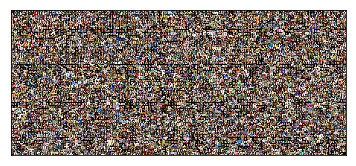

In [254]:
plt.xticks([]), plt.yticks([])
plt.imshow(montage_rgb)

In [255]:
import imageio
imageio.imwrite('lfw_montage_everyone.png', montage_rgb)

In [257]:
montage_rgb_1920 = imutils.resize(montage_rgb, width=1920)
imageio.imwrite('lfw_montage_everyone_1920.jpg', montage_rgb_1920)

In [267]:
import bz2
fp_im = '/data_store/datasets/people/feret/colorferet/colorferet/dvd2/data/images/00740/00740_941201_fa.ppm.bz2'
fp_out = '/home/adam/Downloads/00740_941201_fa.ppm'
from PIL import Image
import io

In [268]:
with open(fp_im, 'rb') as fp_src, open(fp_out, 'wb') as fp_dst:
  im_raw = bz2.decompress(fp_src.read())
  fp_dst.write(im_raw)

TypeError: open() got an unexpected keyword argument 'image'

In [269]:
fp_src = open(fp_im, 'rb')

In [282]:
im = Image.open('/home/adam/Downloads/RAneUTr8mog_1183849_32514_ne2x.png')